In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
from craft import uvfits, craco, craco_kernels, craco_plan
from craco import preprocess

In [3]:
import os
os.system("ln -s /data/seren-10/big/craco/SB051563/scans/00/20230723224626/results/b19.uvfits ~/tmp/b19.uvfits")

0

In [5]:
!ls ~/tmp

]0;gup037@seren-01: ~/Codes/craco-python/notebooksgup037@seren-01:~/Codes/craco-python/notebooks$ ^C

]0;gup037@seren-01: ~/Codes/craco-python/notebooksgup037@seren-01:~/Codes/craco-python/notebooks$ 

In [6]:
fname = "/home/gup037/tmp/b19.uvfits"

uvsource = uvfits.open(fname)

values = craco_plan.get_parser().parse_args([])
values.uv = fname
plan = craco_plan.PipelinePlan(uvsource, values)

/home/gup037/Codes/craft/src/craft/uvfits.py:269: UserWarning: Dont yet support multiple source files: 2 - using source at 2 which is (2, 'VAST_0127-73', 0, '', 0.0, 0.0, 0.0, 0.0, 0.0, 119.99999999999982, 23.37470731081941, -70.39907634705996, 2000.0, 23.37470731081941, -70.39907634705996, 0.0, 0.0, 0.0, 0.0)
  warnings.warn(f'Dont yet support multiple source files: {len(source_table)} - using source at {first_targetidx} which is {row}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=260.0 1-4 uvpix=(0, 253)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=1286.0 5-6 uvpix=(14, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=1286.0 5-6 uvp

Upper registers [(22, 1), (23, 1), (24, 1), (25, 1), (159, 1), (160, 1), (161, 1), (162, 1), (163, 1), (164, 1), (165, 1), (166, 1), (167, 1), (168, 1), (169, 1), (170, 1), (171, 1), (172, 1), (173, 1), (174, 1), (175, 1), (176, 1), (177, 1), (178, 1), (179, 1), (195, 1), (196, 1), (197, 1), (198, 1), (199, 1), (200, 1), (2, 2)]
Lower registers [(2, 5), (4, 5), (6, 7), (8, 9), (8, 10), (9, 10), (9, 11), (10, 11), (2, 12), (11, 12), (2, 13), (12, 13), (2, 14), (13, 14), (14, 15), (15, 16), (15, 17), (16, 17), (16, 18), (17, 18), (15, 19), (16, 19), (17, 19), (18, 19), (5, 20), (13, 20), (14, 20), (16, 20), (18, 20), (19, 20), (4, 21), (5, 21)]


In [7]:
blocker = uvsource.time_blocks_with_uvws(nt=64)

In [53]:
rfi_cleaner = preprocess.RFI_cleaner(block_dtype= np.ma.core.MaskedArray, baseline_order=plan.baseline_order)

In [71]:
block0, uvw0 = next(blocker)

In [98]:
myblock = craco.bl2array(block0)

<IPython.core.display.Javascript object>


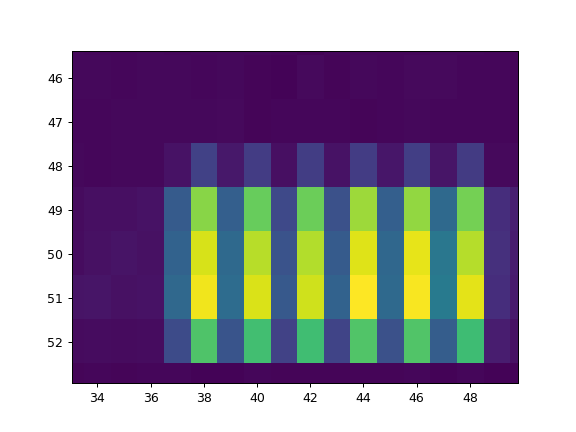

/data/seren-01/fast/gup037/miniconda3/envs/craco/lib/python3.7/site-packages/numpy/ma/core.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)


In [90]:
plt.figure()
plt.imshow(np.abs(myblock).sum(axis=0).squeeze(), aspect='auto', interpolation='None')

In [91]:
cleaned_block, _, _, _ = rfi_cleaner.run_IQRM_cleaning(myblock, False, False, False, False, True, False)

<IPython.core.display.Javascript object>


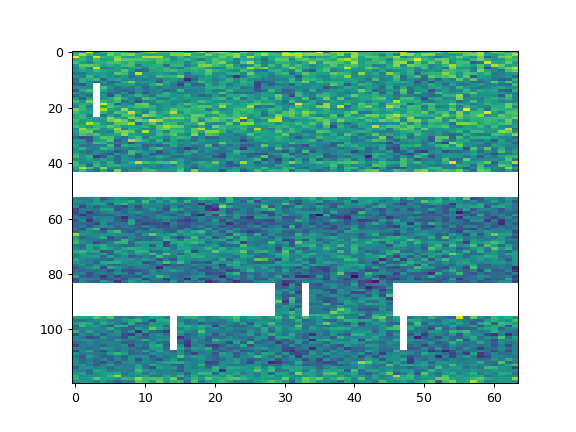

In [92]:
plt.figure()
plt.imshow(np.abs(cleaned_block).sum(axis=0).squeeze(), aspect='auto', interpolation='None')

In [93]:
myblock[100]

masked_array(
  data=[[[(-299-54j), (-207-15j), (-252-223j), ..., (755+54j),
          (-203-402j), (-57-604j)]],

        [[(-154-124j), (-192-762j), (-847-64j), ..., (142+676j),
          (190-70j), (982-1501j)]],

        [[(-252+364j), (231+324j), (502+18j), ..., (-468+161j),
          (253+1374j), (98+409j)]],

        ...,

        [[(102-941j), (-11-78j), (-628+322j), ..., (-349+137j),
          (-535-994j), (999-423j)]],

        [[(-427+301j), (237+806j), (646-10j), ..., (221-50j),
          (-195-147j), (-587-870j)]],

        [[(-642+371j), (-590+122j), (91-615j), ..., (-873-918j),
          (-540+237j), (-325-1453j)]]],
  mask=[[[False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False]],

        ...,

        [[False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, Fal

In [94]:
cleaned_block[100]

masked_array(
  data=[[[(-299-54j), (-207-15j), (-252-223j), ..., (755+54j),
          (-203-402j), (-57-604j)]],

        [[(-154-124j), (-192-762j), (-847-64j), ..., (142+676j),
          (190-70j), (982-1501j)]],

        [[(-252+364j), (231+324j), (502+18j), ..., (-468+161j),
          (253+1374j), (98+409j)]],

        ...,

        [[(102-941j), (-11-78j), (-628+322j), ..., (-349+137j),
          (-535-994j), (999-423j)]],

        [[(-427+301j), (237+806j), (646-10j), ..., (221-50j),
          (-195-147j), (-587-870j)]],

        [[(-642+371j), (-590+122j), (91-615j), ..., (-873-918j),
          (-540+237j), (-325-1453j)]]],
  mask=[[[False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False]],

        ...,

        [[False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, Fal

In [95]:
(myblock.data - cleaned_block.filled()).shape

(231, 120, 1, 64)

<IPython.core.display.Javascript object>


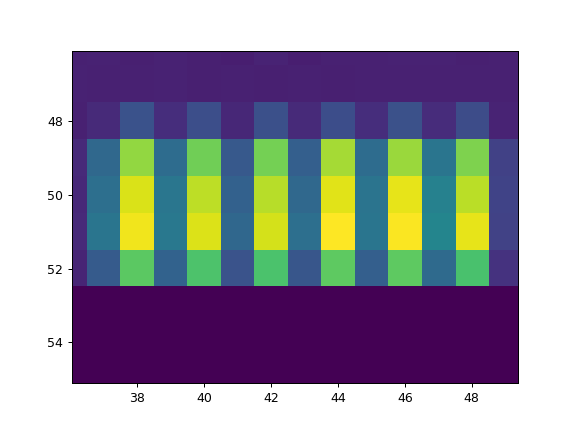

In [100]:
plt.figure()
plt.imshow(np.abs((myblock.data - cleaned_block.filled())).mean(axis=0).squeeze(), aspect='auto', interpolation='None')

In [99]:
myblock[100, 45, 0, :]

masked_array(data=[(-324-143j), (1547-566j), (-265-503j), (1610-289j),
                   (-354-701j), (959-741j), (795-656j), (339-351j),
                   (404-178j), (-252-609j), (769-253j), (44-1260j),
                   (680-913j), (1005-435j), (-629-953j), (838+343j),
                   (-440-980j), (556+169j), (-926-686j), (-84+149j),
                   (641+1254j), (102-1032j), (-389+205j), (-994-1012j),
                   (253+442j), (1030-309j), (411-1254j), (32-1009j),
                   (78+600j), (446-585j), (352-950j), (-1266+578j),
                   (103-286j), (-54+592j), (425-780j), (-51-611j),
                   (-225+289j), (53-848j), (400+487j), (1236+428j),
                   (-1138-169j), (154-685j), (350-721j), (633-25j),
                   (1009-575j), (210+335j), (172-512j), (1387-26j),
                   (-1240-623j), (428-756j), (266+203j), (-112-737j),
                   (678-587j), (-805-382j), (459+86j), (542-671j),
                   (143-1052j), (-138-

In [101]:
cleaned_block.filled()

array([[[[  206. -331.j,  -305. +181.j,  -700. +212.j, ...,
            222. +952.j,  -252. +748.j,  -100. +992.j]],

        [[ -467. -679.j,  -248. -199.j,    61. +163.j, ...,
          -1149. -224.j,  -896. -184.j,    71. +117.j]],

        [[  280. +547.j,   150. +244.j,  -402. +459.j, ...,
           -345. +476.j,  -373. +355.j,   210. +529.j]],

        ...,

        [[ -215.  +18.j,   836. -813.j,    52. +426.j, ...,
            404.  -91.j,   718. -256.j,   127. -417.j]],

        [[ -380. +111.j,   639. +972.j,   448. +137.j, ...,
            316. -632.j,  -211. +389.j,  -541. -149.j]],

        [[  760.-1007.j,   171. +404.j,  -352. +606.j, ...,
           -467.  -31.j,    68. +555.j,   937. -342.j]]],


       [[[  206.  +83.j, -1152. +304.j,   655. -302.j, ...,
            925. -409.j,   114. -646.j,   216.  -88.j]],

        [[   14. -637.j,  1140. -329.j,  -649. +223.j, ...,
          -1051.  +15.j,  -881. -266.j,   488. +216.j]],

        [[-1560.-1206.j,   507. -689.j, 

In [102]:
cleaned_block.shape

(231, 120, 1, 64)

In [117]:
np.abs(cleaned_block).mean(axis=0).fill_value

1e+20

In [104]:
myblock


masked_array(
  data=[[[[(206-331j), (-305+181j), (-700+212j), ..., (222+952j),
           (-252+748j), (-100+992j)]],

         [[(-467-679j), (-248-199j), (61+163j), ..., (-1149-224j),
           (-896-184j), (71+117j)]],

         [[(280+547j), (150+244j), (-402+459j), ..., (-345+476j),
           (-373+355j), (210+529j)]],

         ...,

         [[(-215+18j), (836-813j), (52+426j), ..., (404-91j),
           (718-256j), (127-417j)]],

         [[(-380+111j), (639+972j), (448+137j), ..., (316-632j),
           (-211+389j), (-541-149j)]],

         [[(760-1007j), (171+404j), (-352+606j), ..., (-467-31j),
           (68+555j), (937-342j)]]],


        [[[(206+83j), (-1152+304j), (655-302j), ..., (925-409j),
           (114-646j), (216-88j)]],

         [[(14-637j), (1140-329j), (-649+223j), ..., (-1051+15j),
           (-881-266j), (488+216j)]],

         [[(-1560-1206j), (507-689j), (-48-1395j), ..., (-702-269j),
           (312+196j), (-647-566j)]],

         ...,

         [[(-20

In [118]:
avg_block = preprocess.average_pols(cleaned_block, keepdims=False)

In [119]:
avg_block.fill_value

(1e+20+0j)

In [120]:
normed_block = preprocess.normalise(cleaned_block)

/data/seren-01/fast/gup037/miniconda3/envs/craco/lib/python3.7/site-packages/numpy/ma/core.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)


In [122]:
normed_block.fill_value

0j

In [123]:
cleaned_block.std(axis=-1).shape

/data/seren-01/fast/gup037/miniconda3/envs/craco/lib/python3.7/site-packages/numpy/ma/core.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)


(231, 120, 1)

In [124]:
type(cleaned_block)

numpy.ma.core.MaskedArray

In [130]:
x = np.random.normal(0, 1, 10000) + 1j* np.random.normal(0, 1, 10000)
x = np.ma.MaskedArray(x, mask = False)
x.mask[1002:8000] = True
x.std() / 2**0.5

0.9983089444949178

In [141]:
x = np.random.normal(0, 1, 10000) + 1j* np.random.normal(0, 1, 10000)
x = np.ma.MaskedArray(x, mask = False)
stds = []
for i in range(50):
    x.mask[100: 100 + i*100] = True
    stds.append(x.std())
    
    

<IPython.core.display.Javascript object>


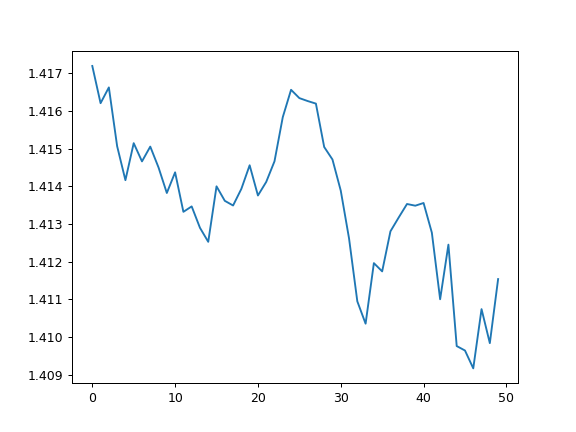

In [142]:
plt.figure()
plt.plot(stds)